# Exercise: Predict Diabetes with a Linear Regression Model

In this exercise, we'll predict a patient's diabetes desease progression from different health indicators such as body mass index, age, blood pressure etc. 

Your tasks are the following:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

## 1. Data Analysis

In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**TODO**: Load in the diabetes dataset from scikit-learn and get familiar with the dataset. Find out these basic properties:

- How many samples does the dataset have?
- How many features does the dataset have?
- Are there any null values that we have to take care of?
- Has the data been standardized already or do we have to take care of this?
- Does the dataset contain numerical or categorical values or both?

In [28]:
# Load dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [29]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [30]:
# Convert to DataFrame 
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [31]:
df.shape

(442, 11)

In [32]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [33]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [34]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


The dataset has 442 samples in total.

It contains 10 standardized features.

There are no null values in the dataset.

The features are already standardized.

The dataset contains only numerical values, with no categorical features.

**TODO**: Plot a histogram in matplotlib to get an overview of the data.

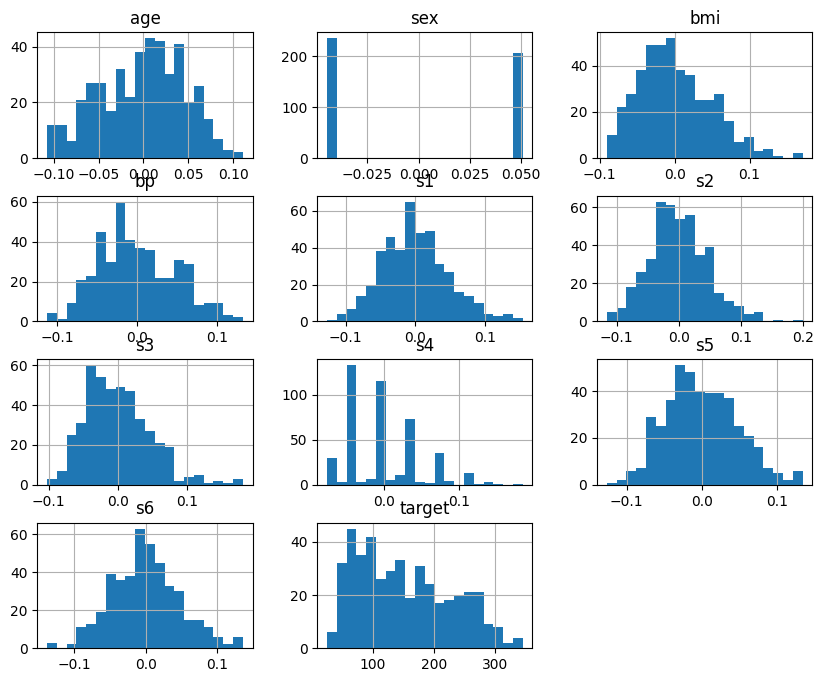

In [35]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

**TODO**: Calculate the linear correlation matrix of the features and the target and plot the results. Which feature is the most important for our prediction goal?

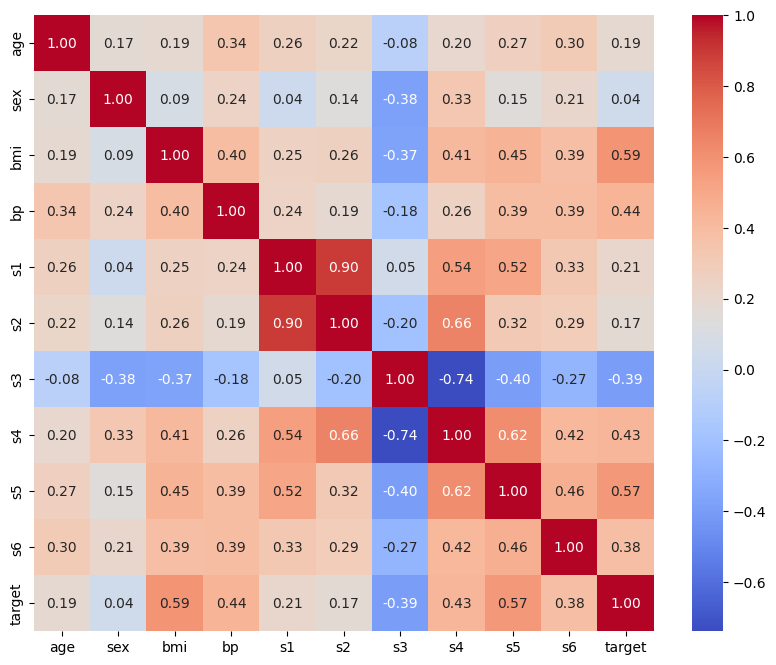

In [36]:
import seaborn as sns
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The feature bmi is the most important for predicting in this dataset, as it has the highest correlation with the target.

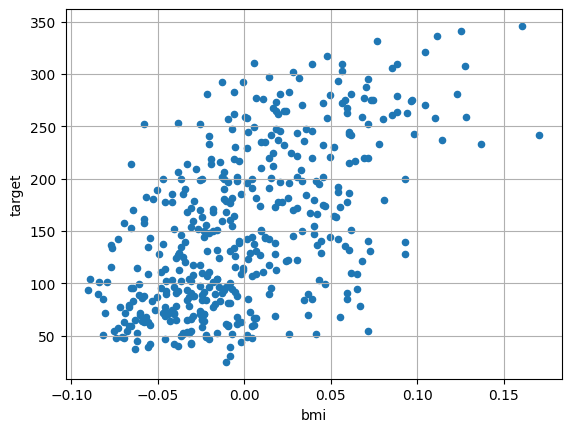

In [37]:
df.plot(kind="scatter", x="bmi", y="target", grid=True)
plt.show()

## 2. Training and Evaluation

**TODO**: Store the features and labels in dataframes called `X` and `y`, respectively. Create a train and test split with 80% training data and 20% test data.

In [38]:
from sklearn.model_selection import train_test_split
# Store features and labels
X = df.drop(columns='target')  # Features
y = df[['target']]             # Labels as a DataFrame

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**TODO**: Create and train a linear regression model.

In [39]:
from sklearn.linear_model import LinearRegression
# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

**TODO**: Evaluate the model on the test dataset: make predictions and calculate the RMSE.

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [41]:
rmse

np.float64(53.85344583676593)

**TODO**: Train a simple linear regression model with only the most important feature for comparison and plot the predictions and the measurements. Do you think we have found a reasonable model according to the plot?

In [42]:
X_bmi = df[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

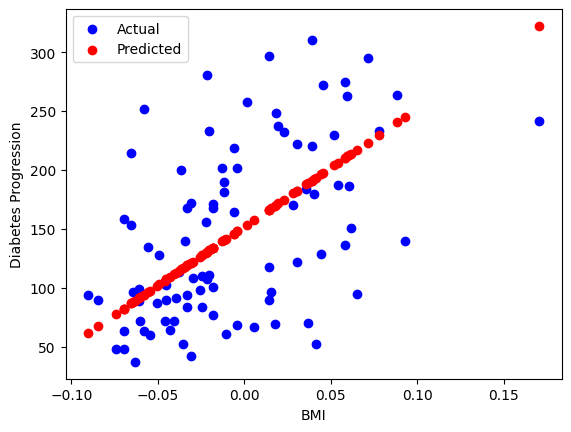

In [43]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()